### Sowutwom Clinic Dataset

Getting the dependencies up and running.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Loading and inspecting the dataset

In [2]:
try:
    df = pd.read_csv('sowutuom_clinic_dataset.csv')
    print("Dataset Loaded Successfully.")
except FileNotFoundError:
    print("Error: File not found. Please upload 'sowutuom_clinic_dataset.csv'.")
    # Stop execution if file is missing (for a real script, you'd exit here)

Dataset Loaded Successfully.


Quick inspection

In [3]:
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- First 5 Rows ---")
print(df.head())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   clinic         500 non-null    object 
 1   age            500 non-null    int64  
 2   height         500 non-null    float64
 3   weight         500 non-null    float64
 4   bmi            500 non-null    float64
 5   glucose_level  500 non-null    int64  
 6   blood_group    500 non-null    object 
 7   genotype       500 non-null    object 
 8   diabetic       500 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 35.3+ KB
None

--- First 5 Rows ---
     clinic  age  height  weight   bmi  glucose_level blood_group genotype  \
0  clinic_1   18   168.9    91.3  31.7            116          O+       AA   
1  clinic_1   60   170.8    87.9  29.8             76          B+       AA   
2  clinic_1   55   182.2    77.9  23.2            102          O+ 

Checking for class imbalance

In [4]:
print("\n--- Target Distribution (0 = Non-Diabetic, 1 = Diabetic) ---")
print(df['diabetic'].value_counts(normalize=True))


--- Target Distribution (0 = Non-Diabetic, 1 = Diabetic) ---
diabetic
0    0.86
1    0.14
Name: proportion, dtype: float64


Data preprocessing converting variables to numbers

In [5]:
le = LabelEncoder()
categorical_cols = ['clinic', 'blood_group', 'genotype']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded {col}: {le.classes_}")

Encoded clinic: ['clinic_1' 'clinic_2' 'clinic_3' 'clinic_4' 'clinic_5']
Encoded blood_group: ['A+' 'A-' 'AB+' 'B+' 'B-' 'O+' 'O-']
Encoded genotype: ['AA' 'AS' 'SS']


Feature selection dropping clinic as it is irrelevant to diabetes status

In [6]:
X = df.drop(['diabetic', 'clinic'], axis=1)
y = df['diabetic']

Train-test splitting 80% for training and 20% for testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Scaling (important for logistic regression)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Exploratory data analysis

Correlation Matrix

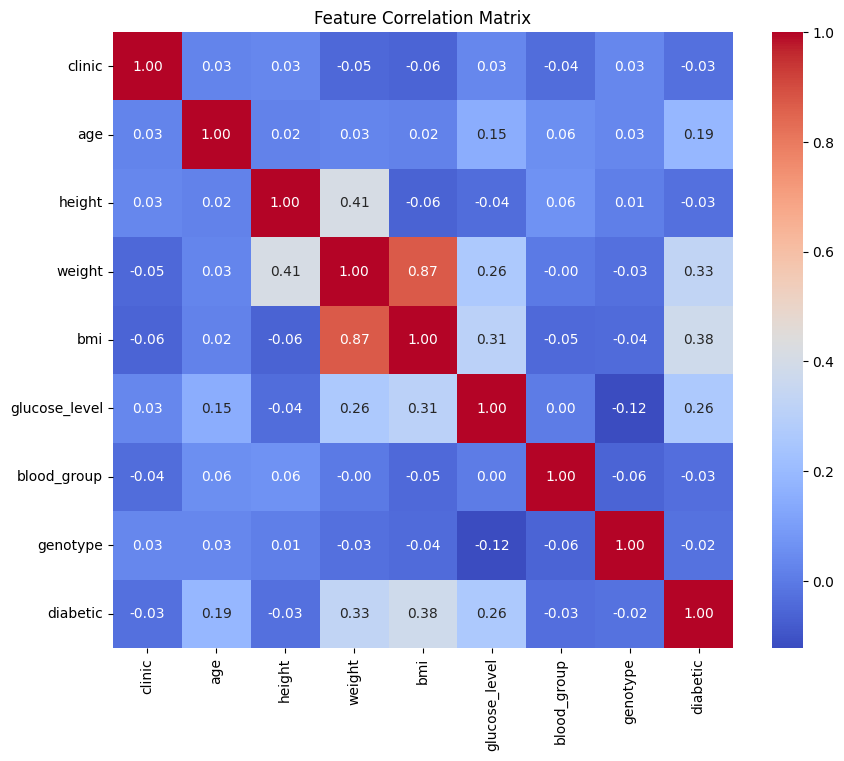

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.savefig('diabetes_correlation.png')
plt.show()

Visualizing Glucose vs BMI by diabetic status

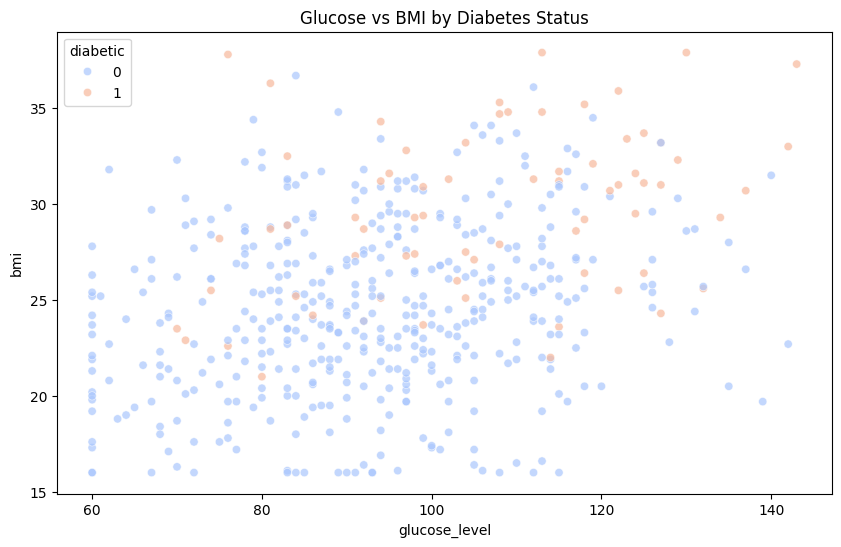

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='glucose_level', y='bmi', hue='diabetic', palette='coolwarm', alpha=0.7)
plt.title('Glucose vs BMI by Diabetes Status')
plt.savefig('glucose_bmi_scatter.png')
plt.show()

Model training and evaluation

Helper function to evaluate models

In [11]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n--- {model_name} Performance ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}

First Model: Logistic regression

In [12]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
results_log = evaluate_model(log_reg, X_test_scaled, y_test, "Logistic Regression")


--- Logistic Regression Performance ---
Accuracy:  0.9000
Precision: 0.8333
Recall:    0.3571
F1 Score:  0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        86
           1       0.83      0.36      0.50        14

    accuracy                           0.90       100
   macro avg       0.87      0.67      0.72       100
weighted avg       0.89      0.90      0.88       100



Second Model: Random forest

In [13]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train) # Tree models don't require scaling
results_rf = evaluate_model(rf_clf, X_test, y_test, "Random Forest")


--- Random Forest Performance ---
Accuracy:  0.8800
Precision: 0.7500
Recall:    0.2143
F1 Score:  0.3333

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        86
           1       0.75      0.21      0.33        14

    accuracy                           0.88       100
   macro avg       0.82      0.60      0.63       100
weighted avg       0.87      0.88      0.85       100



Feature importance (Random forest)


--- Random Forest Feature Importance ---
bmi              0.232430
weight           0.203692
glucose_level    0.172461
age              0.151595
height           0.140182
blood_group      0.064583
genotype         0.035057
dtype: float64


C:\Users\Immanuel\AppData\Local\Temp\ipykernel_25172\147951502.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


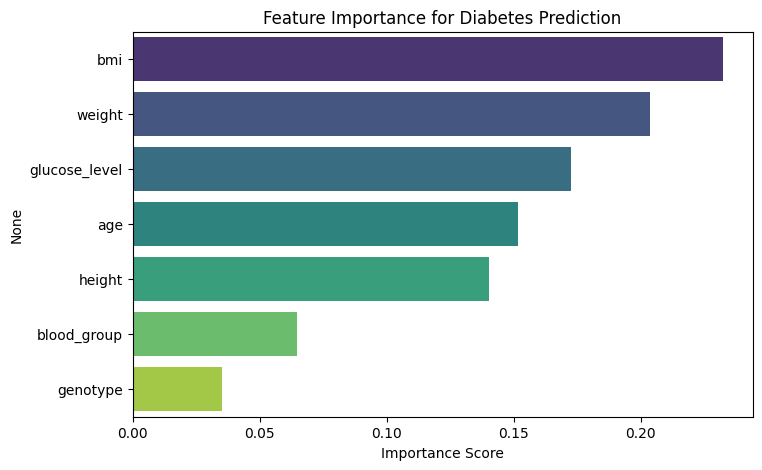

In [14]:
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\n--- Random Forest Feature Importance ---")
print(feature_importances)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance for Diabetes Prediction')
plt.xlabel('Importance Score')
plt.savefig('feature_importance.png')
plt.show()

Final Comparison

In [15]:
comparison_df = pd.DataFrame([results_log, results_rf])
print("\n--- Model Comparison Table ---")
print(comparison_df.to_markdown(index=False))


--- Model Comparison Table ---
| Model               |   Accuracy |   Precision |   Recall |       F1 |
|:--------------------|-----------:|------------:|---------:|---------:|
| Logistic Regression |       0.9  |    0.833333 | 0.357143 | 0.5      |
| Random Forest       |       0.88 |    0.75     | 0.214286 | 0.333333 |
